In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import requests
import httpx
import unicodedata

In [5]:
stats = [
    'goals', 'successfulDribbles', 'tackles', 'assists', 'accuratePassesPercentage', 'rating',
    'successfulDribblesPercentage', 'blockedShots', 'penaltyWon', 'goalsFromOutsideTheBox', 
    'hitWoodwork', 'expectedGoals', 'totalShots', 'goalConversionPercentage', 
    'headedGoals', 'offsides', 'bigChancesMissed', 'shotsOnTarget', 'penaltiesTaken', 
    'leftFootGoals', 'shotsOffTarget', 'penaltyGoals', 'goalsFromInsideTheBox', 
    'rightFootGoals', 'ownGoals', 'dribbledPast', 'bigChancesCreated', 'totalPasses', 'accurateFinalThirdPasses',
    'keyPasses', 'accurateLongBallsPercentage', 'accuratePasses', 
    'accurateOwnHalfPasses', 'accurateCrosses',  'inaccuratePasses', 'accurateOppositionHalfPasses',
    'accurateCrossesPercentage', 'yellowCards', 'redCards', 'aerialDuelsWon', 'minutesPlayed', 'possessionLost',
    'aerialDuelsWonPercentage', 'wasFouled', 'appearances', 'groundDuelsWon', 'totalDuelsWon', 'fouls', 
    'groundDuelsWonPercentage', 'totalDuelsWonPercentage', 'dispossessed', 'saves', 'punches',
    'crossesNotClaimed', 'runsOut', 'goalsConcededInsideTheBox',
    'successfulRunsOut', 'goalsConcededOutsideTheBox', 'highClaims', 'shotFromSetPiece', 'freeKickGoal', 
    'penaltyConversion', 'setPieceConversion', 'errorLeadToGoal', 'cleanSheet', 'clearances', 'accurateLongBalls',
    'passToAssist', 'matchesStarted', 'savedShotsFromInsideTheBox',
    'savedShotsFromOutsideTheBox', 'penaltySave', 'penaltyFaced', 'penaltyConceded', 
    'interceptions', 'errorLeadToShot'
] 

# Convert the list of stats into a comma-separated string
fields = ','.join(stats)

def get_season_stats(positions:list, fields, accumulation = 'total', preferred_foot=None, home_away = None):
    base_url = 'https://www.sofascore.com/api/v1/unique-tournament/17/season/52186/statistics'
    df = pd.DataFrame()
    for pos in positions:
        for offset in range(0, 400, 100):
            url = f'{base_url}?limit=100&offset={offset}&order=-rating&accumulation={accumulation}&fields={fields}&filters=position.in.{pos}&preferredFoot.EQ.{preferred_foot}&type.EQ.{home_away}'
            print(url)
            with httpx.Client() as client:
                response = client.get(url)
                results = response.json().get('results')

                sub_df = pd.json_normalize(results)
                sub_df['position'] = pos

                df = pd.concat([df, sub_df])
                
    return df
data = get_season_stats(['G', 'F', 'M', 'D'], fields)
df = data[['player.name', 'player.id']]
df['player.id'] = df['player.id'].astype(int)
data = df.to_dict(orient='records')

player_dict = {item['player.name']: item['player.id'] for item in data}

https://www.sofascore.com/api/v1/unique-tournament/17/season/52186/statistics?limit=100&offset=0&order=-rating&accumulation=total&fields=goals,successfulDribbles,tackles,assists,accuratePassesPercentage,rating,successfulDribblesPercentage,blockedShots,penaltyWon,goalsFromOutsideTheBox,hitWoodwork,expectedGoals,totalShots,goalConversionPercentage,headedGoals,offsides,bigChancesMissed,shotsOnTarget,penaltiesTaken,leftFootGoals,shotsOffTarget,penaltyGoals,goalsFromInsideTheBox,rightFootGoals,ownGoals,dribbledPast,bigChancesCreated,totalPasses,accurateFinalThirdPasses,keyPasses,accurateLongBallsPercentage,accuratePasses,accurateOwnHalfPasses,accurateCrosses,inaccuratePasses,accurateOppositionHalfPasses,accurateCrossesPercentage,yellowCards,redCards,aerialDuelsWon,minutesPlayed,possessionLost,aerialDuelsWonPercentage,wasFouled,appearances,groundDuelsWon,totalDuelsWon,fouls,groundDuelsWonPercentage,totalDuelsWonPercentage,dispossessed,saves,punches,crossesNotClaimed,runsOut,goalsConcededInsi

https://www.sofascore.com/api/v1/unique-tournament/17/season/52186/statistics?limit=100&offset=200&order=-rating&accumulation=total&fields=goals,successfulDribbles,tackles,assists,accuratePassesPercentage,rating,successfulDribblesPercentage,blockedShots,penaltyWon,goalsFromOutsideTheBox,hitWoodwork,expectedGoals,totalShots,goalConversionPercentage,headedGoals,offsides,bigChancesMissed,shotsOnTarget,penaltiesTaken,leftFootGoals,shotsOffTarget,penaltyGoals,goalsFromInsideTheBox,rightFootGoals,ownGoals,dribbledPast,bigChancesCreated,totalPasses,accurateFinalThirdPasses,keyPasses,accurateLongBallsPercentage,accuratePasses,accurateOwnHalfPasses,accurateCrosses,inaccuratePasses,accurateOppositionHalfPasses,accurateCrossesPercentage,yellowCards,redCards,aerialDuelsWon,minutesPlayed,possessionLost,aerialDuelsWonPercentage,wasFouled,appearances,groundDuelsWon,totalDuelsWon,fouls,groundDuelsWonPercentage,totalDuelsWonPercentage,dispossessed,saves,punches,crossesNotClaimed,runsOut,goalsConcededIn

https://www.sofascore.com/api/v1/unique-tournament/17/season/52186/statistics?limit=100&offset=0&order=-rating&accumulation=total&fields=goals,successfulDribbles,tackles,assists,accuratePassesPercentage,rating,successfulDribblesPercentage,blockedShots,penaltyWon,goalsFromOutsideTheBox,hitWoodwork,expectedGoals,totalShots,goalConversionPercentage,headedGoals,offsides,bigChancesMissed,shotsOnTarget,penaltiesTaken,leftFootGoals,shotsOffTarget,penaltyGoals,goalsFromInsideTheBox,rightFootGoals,ownGoals,dribbledPast,bigChancesCreated,totalPasses,accurateFinalThirdPasses,keyPasses,accurateLongBallsPercentage,accuratePasses,accurateOwnHalfPasses,accurateCrosses,inaccuratePasses,accurateOppositionHalfPasses,accurateCrossesPercentage,yellowCards,redCards,aerialDuelsWon,minutesPlayed,possessionLost,aerialDuelsWonPercentage,wasFouled,appearances,groundDuelsWon,totalDuelsWon,fouls,groundDuelsWonPercentage,totalDuelsWonPercentage,dispossessed,saves,punches,crossesNotClaimed,runsOut,goalsConcededInsi

/var/folders/8_/_mkv7dtj7hvfvhvj31qsy35h0000gn/T/ipykernel_17138/2023980426.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player.id'] = df['player.id'].astype(int)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


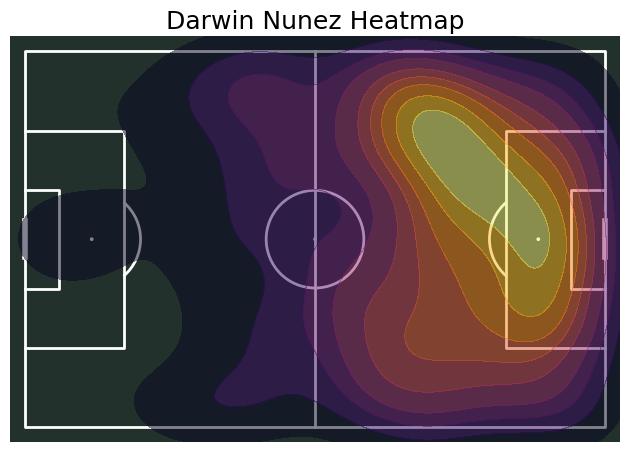

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


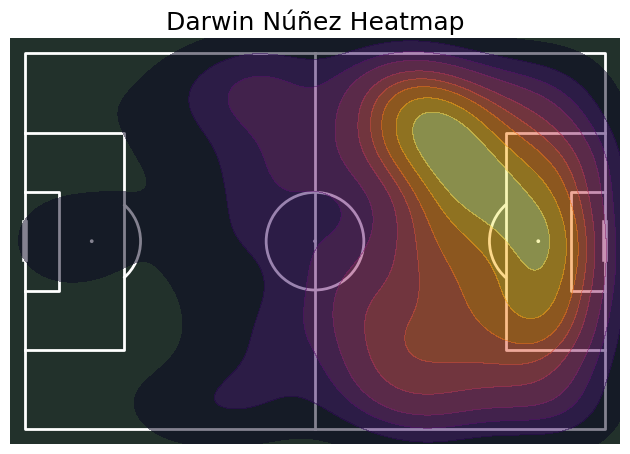

In [29]:
normalized_player_dict = {normalize_name(name): player_id for name, player_id in player_dict.items()}

# Create a reverse dictionary to map IDs back to original names
id_to_name_dict = {player_id: name for name, player_id in player_dict.items()}

def plot_heatmap(player_identifier):
    if isinstance(player_identifier, int):
        # If input is an ID, get the player name
        player_id = player_identifier
        player_name = id_to_name_dict.get(player_id, "Unknown Player")
    elif isinstance(player_identifier, str):
        # If input is a name, normalize it and get the player ID
        normalized_name = normalize_name(player_identifier)
        player_id = normalized_player_dict.get(normalized_name)
        if player_id is None:
            print(f"Player '{player_identifier}' not found.")
            return
        player_name = player_identifier
    else:
        print("Invalid player identifier. Must be an integer ID or a string name.")
        return

    url = f'https://sofascore.com/api/v1/player/{player_id}/unique-tournament/17/season/52186/heatmap/overall'
    
    # Fetch data from the API
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch data: {response.status_code}")
        return

    data = response.json()
    if 'points' not in data:
        print("Invalid data format")
        return
    
    points_list = data['points']

    # Create a dataframe
    df = pd.DataFrame(points_list)

    pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='white')

    # Plot the pitch
    fig, ax = pitch.draw()

    # Create KDE plot on the pitch
    kde = sns.kdeplot(
        data=df,
        x='x',
        y='y',
        fill=True,  # `shade` is replaced by `fill`
        alpha=0.5,
        levels=10,
        cmap='inferno',  # Using a valid colormap
        ax=ax  # Pass the Axes object to draw the KDE plot on the pitch
    )

    # Set the plot title
    ax.set_title(f"{player_name} Heatmap", fontsize=18, color='black')

    # Show the plot
    plt.show()

# Example usage
plot_heatmap("Darwin Nunez")  # Using player name
plot_heatmap(924871)  # Using player ID

In [28]:
player_dict

{'Arijanet Murić': 888971,
 'Thomas Strakosha': 227212,
 'Alphonse Aréola': 96531,
 'André Onana': 787498,
 'Jordan Pickford': 138530,
 'Martin Dúbravka': 42209,
 'Mark Travers': 856720,
 'Bart Verbruggen': 994363,
 'José Sá': 252669,
 'Robert Sánchez': 920546,
 'Neto': 84844,
 'Emiliano Martínez': 158263,
 'Robin Olsen': 26025,
 'Bernd Leno': 103335,
 'Mark Flekken': 171919,
 'Guglielmo Vicario': 553606,
 'Łukasz Fabiański': 15479,
 'Alisson': 243609,
 'James Shea': 137789,
 'Ederson': 254491,
 'Nick Pope': 162653,
 'James Trafford': 980643,
 'Wesley Foderingham': 187861,
 'Matt Turner': 833943,
 'Caoimhin Kelleher': 827362,
 'Stefan Ortega': 125274,
 'Đorđe Petrović': 882604,
 'Thomas Kaminski': 45959,
 'David Raya': 581310,
 'Dean Henderson': 788134,
 'Sam Johnstone': 98427,
 'Ivo Grbić': 283847,
 'Jason Steele': 31867,
 'Odysseas Vlachodimos': 138149,
 'Matz Sels': 78152,
 'Aaron Ramsdale': 839410,
 'Daniel Bentley': 101367,
 'Loris Karius': 174135,
 'Remi Matthews': 581610,
 'Ionu